# PROJECT PART 1
# Hotel Booking Data Analysis Project - Part 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("DS1_C5_S5_Hotel Dataset.csv")

# Task 1: Data Cleaning
Perform the necessary data cleaning steps to convert messy,
unclean data into clean data.

In [5]:
df.isnull().sum()

hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             0
babies                               0
meal                                 0
country                              0
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                              127
company                           2066
days_in_waiting_list     

In [6]:
# filling the missing values with Not Available
df.fillna('Not Available', inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           2097 non-null   object 
 1   is_canceled                     2097 non-null   int64  
 2   lead_time                       2097 non-null   int64  
 3   arrival_date_year               2097 non-null   int64  
 4   arrival_date_month              2097 non-null   object 
 5   arrival_date_week_number        2097 non-null   int64  
 6   arrival_date_day_of_month       2097 non-null   int64  
 7   stays_in_weekend_nights         2097 non-null   int64  
 8   stays_in_week_nights            2097 non-null   int64  
 9   adults                          2097 non-null   int64  
 10  children                        2097 non-null   int64  
 11  babies                          2097 non-null   int64  
 12  meal                            20

In [8]:
df.sort_values(by = 'days_in_waiting_list', ascending = False)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1349,City Hotel,0,221,2016,August,33,12,0,1,1,...,No Deposit,6.0,Not Available,147,Transient-Party,73.00,0,0,Check-Out,13-08-2016
1324,City Hotel,0,226,2016,July,30,22,0,2,2,...,No Deposit,1.0,Not Available,96,Transient-Party,76.50,0,1,Check-Out,24-07-2016
1335,City Hotel,0,226,2016,July,30,22,0,2,2,...,No Deposit,1.0,Not Available,96,Transient-Party,76.50,0,1,Check-Out,24-07-2016
1334,City Hotel,0,226,2016,July,30,22,0,2,1,...,No Deposit,1.0,Not Available,96,Transient-Party,64.25,0,0,Check-Out,24-07-2016
1333,City Hotel,0,226,2016,July,30,22,0,2,2,...,No Deposit,1.0,Not Available,96,Transient-Party,76.50,0,1,Check-Out,24-07-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,City Hotel,1,32,2016,October,42,15,2,1,2,...,No Deposit,9.0,Not Available,0,Transient,161.33,0,0,Canceled,14-09-2016
693,City Hotel,1,54,2016,October,42,13,0,3,2,...,No Deposit,9.0,Not Available,0,Transient,139.50,0,3,Canceled,03-10-2016
692,City Hotel,1,59,2016,October,42,13,0,3,2,...,No Deposit,14.0,Not Available,0,Transient,128.70,0,0,Canceled,10-10-2016
691,City Hotel,1,97,2016,October,42,12,1,4,2,...,No Deposit,14.0,Not Available,0,Transient,176.80,0,0,No-Show,12-10-2016


In [9]:
for i in df.columns:
    print(i)
    print(f'UNIQUE VALUES : ----> {i}---> {df[i].unique()}\n')

hotel
UNIQUE VALUES : ----> hotel---> ['Resort Hotel' 'City Hotel']

is_canceled
UNIQUE VALUES : ----> is_canceled---> [0 1]

lead_time
UNIQUE VALUES : ----> lead_time---> [ 68  14  10   9  51  98  88  42   7  70 110   5  34  30   2   0   4  25
 119  69 130  54  11  23  44  46  18   3  24  22 114  91  77  26 123 124
 542  36 139 135  75  76  40  73 211 133 255 192  55  28  16  94 201 259
  12 175  57 244 103 116  59 171 153 161 188 160  17  74  41  39  13  71
  49  37 193  32  89 172 179  81  38   1 109  58  29   6  19  27   8  79
 113  33  67 129 136  65  56  48 170  61  97  92 151 217  15  95 219  50
 237 228 205 145  35 146 100 108 155  80  21  53 241  63  84  85  96 319
 106 120  93 203 112  83 247 104  64  45 159  72 164 199 281  60 117 220
 212 173 176 194 125 126  82  52  62 233  31  87  78  86 102 107 169 144
 154  90 206 101 128  99 134 131 143 127 105 243 198 253 274  47 122 196
  20 223 195  43 208 111 202 316 148 327 324 156 224 283 272 185 225 315
 140 238 138 150 302 191 

In [10]:
numerical_columns = df.select_dtypes(include = ['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include = object).columns

# Task 2: Booking Pattern Analysis

I. What are the peak booking periods for the hotel?

Il. Is there a relationship between lead time and the likelihood
of a booking being cancelled?

Ill. How do booking patterns vary by month, week, and day of
the week?

## T2_1. What are the peak booking periods for the hotel?

In [13]:
# peak booking period --- 
# considering the maximum waiting time and maximum arrival count in the month

In [14]:
peak_booking_month = df.groupby(['arrival_date_month'])[['arrival_date_month']].count().rename(columns = {'arrival_date_month' : 'Count_Arrival'}).sort_values(by = 'Count_Arrival')
peak_booking_month

,Count_Arrival
arrival_date_month,
November,68
February,73
December,82
January,90
March,150
October,159
April,181
September,185
May,258


[Text(0.5, 1.0, 'Booking Periods - MONTHS'),
 Text(0.5, 0, 'Number of Guests'),
 Text(0, 0.5, 'Months')]

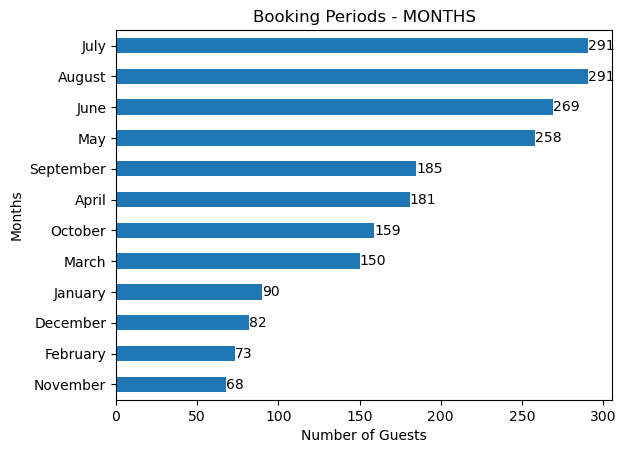

In [15]:
# creating group by 
peak_booking_month = df.groupby(['arrival_date_month'])['arrival_date_month'].count().rename('Count_Arrival').sort_values()

# Plotting the data
ax = peak_booking_month.plot(kind='barh')

# Adding data labels
for index, value in enumerate(peak_booking_month):
    plt.text(value, index, str(value), va='center')
ax.set(title = 'Booking Periods - MONTHS', 
      xlabel = 'Number of Guests', 
      ylabel = 'Months')


## T2_2. Is there a relationship between lead time and the likelihood of a booking being cancelled?

In [17]:
# METHOD TO ASSIGN LEAD TIME (DAYS) GROUPS
def assign_group(lead_time):
    if lead_time < 30:
        return '0-30'
    elif lead_time < 60:
        return '30-60'
    elif lead_time < 90:
        return '60-90'
    elif lead_time < 120:
        return '90-120'
    elif lead_time < 150:
        return '120-150'
    elif lead_time < 200:
        return '150-200'
    elif lead_time < 300:
        return '200-300'
    else:
        return '300 and above'

# Use assign to create the new column
df['lead_time_group'] = df['lead_time'].apply(assign_group)

In [18]:
df['lead_time_group'].unique()

array(['60-90', '0-30', '30-60', '90-120', '120-150', '300 and above',
       '200-300', '150-200'], dtype=object)

In [19]:
# Crosstab creation
crt = pd.crosstab(index = df['lead_time_group'], columns = df['is_canceled']).rename(columns = {0 : 'Not_Cancelled', 1 : 'Cancelled'})#.sort_values(by = 'Cancelled', ascending = False)

# Reordering and sorting by the index
group_ordered = ['0-30', '30-60', '60-90', '90-120', '120-150', '150-200', '200-300', '300 and above']
crt.index = pd.CategoricalIndex(crt.index , 
                   categories = group_ordered,
                    ordered = True)
crt = crt.sort_index()

# calculating the rate of cancellation
crt['Cancellation_Rate'] = crt['Cancelled'] / (crt['Not_Cancelled'] + crt['Cancelled'])
display(crt)

is_canceled,Not_Cancelled,Cancelled,Cancellation_Rate
lead_time_group,,,
0-30,684,104,0.131980
30-60,257,108,0.295890
60-90,178,72,0.288000
90-120,129,49,0.275281
120-150,114,48,0.296296
150-200,92,61,0.398693
200-300,116,37,0.241830
300 and above,26,22,0.458333


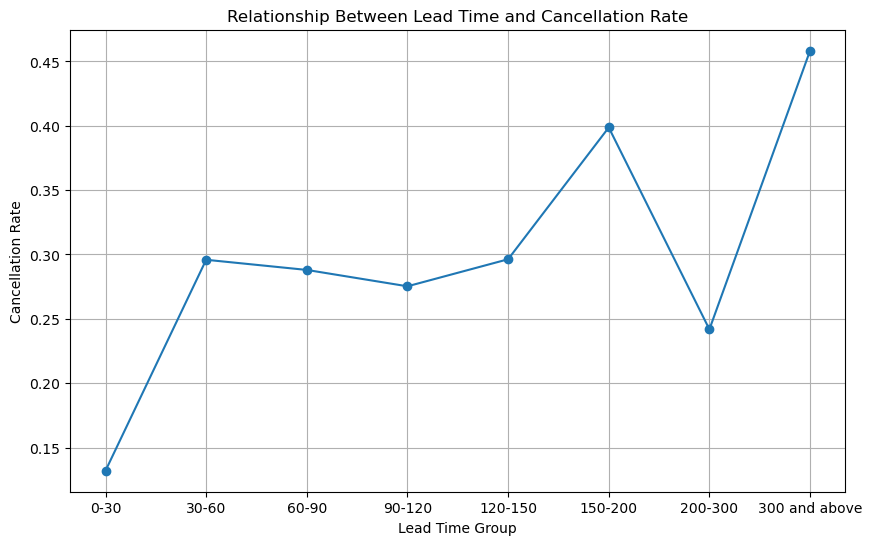

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


# Plotting the relationship
plt.figure(figsize=(10, 6))
plt.plot(crt.index, crt['Cancellation_Rate'], marker='o')
plt.title('Relationship Between Lead Time and Cancellation Rate')
plt.ylabel('Cancellation Rate')
plt.xlabel('Lead Time Group')
plt.grid(True)  # Optional: add grid for better readability
plt.show()


<Figure size 2000x800 with 0 Axes>

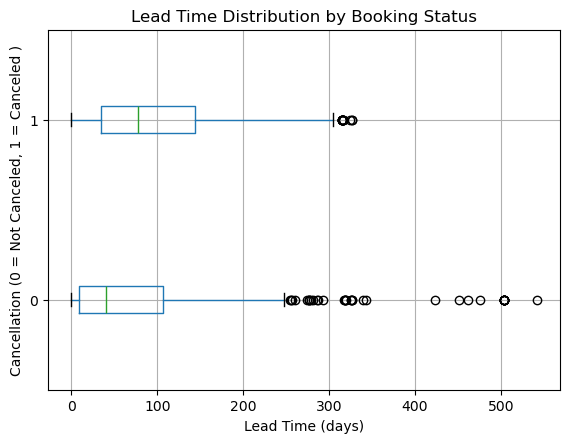

In [21]:
# creating boxplot

plt.figure(figsize=(20, 8))
#sns.set_style('whitegrid')
df.boxplot(column='lead_time', by='is_canceled', grid=True, vert = False)
plt.title('Lead Time Distribution by Booking Status')
plt.ylabel('Cancellation (0 = Not Canceled, 1 = Canceled )')
plt.xlabel('Lead Time (days)')
plt.suptitle('')  # Suppress the automatic title to make the plot cleaner
plt.show()


## T2_3. How do booking patterns vary by month, week, and day of the week?|

In [23]:
# for i in df['arrival_date_year'].unique():
# print(i)
cond_not_cancelled = df['is_canceled'] == 0
cond_cancelled = df['is_canceled'] == 1

month_not_cancelled = df[cond_not_cancelled].groupby('arrival_date_month')[['is_canceled']].count()
week_num_not_cancelled = df[cond_not_cancelled].groupby('arrival_date_week_number')[['is_canceled']].count()
day_of_month_not_cancelled = df[cond_not_cancelled].groupby('arrival_date_day_of_month')[['is_canceled']].count()

month_cancelled = df[cond_cancelled].groupby('arrival_date_month')[['is_canceled']].count().rename(columns  = {'is_canceled' : 'not_cancelled'})
week_num_cancelled = df[cond_cancelled].groupby('arrival_date_week_number')[['is_canceled']].count().rename(columns  = {'is_canceled' : 'not_cancelled'})
day_of_month_cancelled = df[cond_cancelled].groupby('arrival_date_day_of_month')[['is_canceled']].count().rename(columns  = {'is_canceled' : 'not_cancelled'})

In [24]:
month_booking = pd.concat([month_not_cancelled, month_cancelled] , axis = 1)
week_num_booking = pd.concat([week_num_not_cancelled, week_num_cancelled] , axis = 1)
day_of_month_booking = pd.concat([day_of_month_not_cancelled, day_of_month_cancelled] , axis = 1)
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

month_booking.index = pd.CategoricalIndex(month_booking.index, month_order, ordered = True)
# Sort the DataFrame by the categorical index
month_booking = month_booking.sort_index()

month_booking['cancellation_rate'] = month_booking['is_canceled'] / (month_booking['not_cancelled'] + month_booking['is_canceled'])
week_num_booking['cancellation_rate'] = week_num_booking['is_canceled'] / (week_num_booking['not_cancelled'] + week_num_booking['is_canceled'])
day_of_month_booking['cancellation_rate'] = day_of_month_booking['is_canceled'] / (day_of_month_booking['not_cancelled'] + day_of_month_booking['is_canceled'])


In [25]:
month_booking

,is_canceled,not_cancelled,cancellation_rate
arrival_date_month,,,
January,82,8,0.911111
February,60,13,0.821918
March,118,32,0.786667
April,129,52,0.712707
May,179,79,0.693798
June,209,60,0.776952
July,205,86,0.704467
August,202,89,0.694158
September,155,30,0.837838


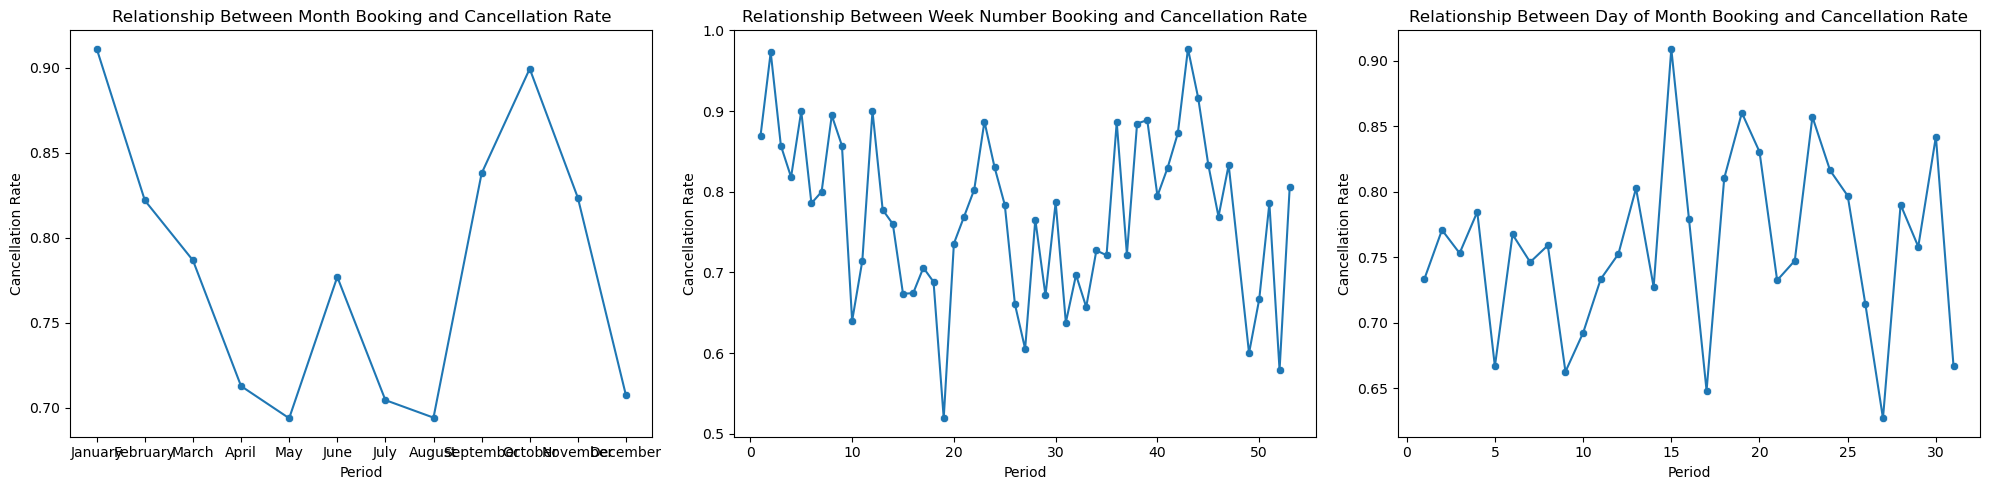

In [26]:
# Assuming month_booking, week_num_booking, and day_of_month_booking DataFrames are already created and filled

to_plot = [month_booking, week_num_booking, day_of_month_booking]
names = ['Month Booking', 'Week Number Booking', 'Day of Month Booking']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Loop through each DataFrame and corresponding subplot axis
for frame, name, ax in zip(to_plot, names, axes):
    sns.scatterplot(ax=ax, y=frame['cancellation_rate'], x=frame.index)
    sns.lineplot(ax=ax, x=frame.index, y=frame['cancellation_rate'])
    ax.set_title(f'Relationship Between {name} and Cancellation Rate')
    ax.set_xlabel('Period')
    ax.set_ylabel('Cancellation Rate')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Task 3: Booking Cancellation Analysis

I. What factors influence booking cancellations?

Il. Are there specific trends or patterns in cancellations over time?

Ill. Can we identify high-risk bookings that are more likely to be canceled?

## T3_1. I. What factors influence booking cancellations?

## T3_2. II. Are there specific trends or patterns in cancellations over time?

## T3_3. III. Can we identify high-risk bookings that are more likely to be canceled?

In [31]:
month_con = df['arrival_date_month'].isin(['January', 'October']) 
day_month_con = df['arrival_date_day_of_month'].isin(np.arange(10, 21))
week_con = df['arrival_date_week_number'].isin(values = np.concatenate([np.arange(1, 10) ,np.arange(40, 50)] ))
not_cancelled_yet_con = df['is_canceled'] == 0
cond = (month_con & day_month_con & week_con & not_cancelled_yet_con) #|  (week_con & day_month_con & not_cancelled_yet_con))

high_risk = df.loc[cond].sort_values(by = 'lead_time', ascending = False)
high_risk

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_group
978,City Hotel,0,241,2015,October,43,19,1,2,2,...,1.0,Not Available,0,Transient-Party,60.00,0,0,Check-Out,22-10-2015,200-300
975,City Hotel,0,241,2015,October,43,19,1,2,2,...,1.0,Not Available,0,Transient-Party,60.00,0,0,Check-Out,22-10-2015,200-300
971,City Hotel,0,241,2015,October,43,19,1,2,2,...,1.0,Not Available,0,Transient-Party,60.00,0,0,Check-Out,22-10-2015,200-300
972,City Hotel,0,241,2015,October,43,19,1,2,2,...,1.0,Not Available,0,Transient-Party,60.00,0,0,Check-Out,22-10-2015,200-300
973,City Hotel,0,241,2015,October,43,19,1,2,2,...,1.0,Not Available,0,Transient-Party,60.00,0,0,Check-Out,22-10-2015,200-300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502,City Hotel,0,0,2016,October,42,13,1,3,2,...,14.0,Not Available,0,Transient,12.00,0,0,Check-Out,17-10-2016,0-30
291,Resort Hotel,0,0,2016,October,42,11,0,2,2,...,250.0,Not Available,0,Transient,96.00,1,0,Check-Out,13-10-2016,0-30
1483,City Hotel,0,0,2016,October,42,10,1,0,1,...,152.0,Not Available,0,Transient,82.66,0,0,Check-Out,11-10-2016,0-30
1486,City Hotel,0,0,2016,October,42,12,0,1,1,...,Not Available,Not Available,0,Transient,136.00,0,0,Check-Out,13-10-2016,0-30


Text(0.5, 1.0, 'High Risk Cancellations Booking')

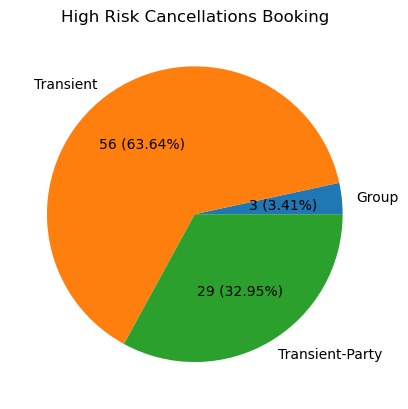

In [32]:
high_risk_group_by = high_risk.groupby('customer_type').size()

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{val} ({pct:.2f}%)'
    return my_format

high_risk_group_by.plot(kind = 'pie', autopct = autopct_format(high_risk_group_by)) # '%.2f%%'
plt.title('High Risk Cancellations Booking')

##### redundant

# Task 4: Customer Behavioral Segmentation

I. Are there distinct pattems in the lead time, special requests, or room preferences for different customer segments?

Il. Which marketing channels are the most effective for reaching specific customer segments?
                                                   
lll. How can marketing strategies be customized to resonate with specific customer segments, considering factors such as previous cancellations, 
booking lead time, and special requests? 

### T4_1. I. Are there distinct pattems in the lead time, special requests, or room preferences for different customer segments?

In [36]:
df['customer_type'].unique() 

array(['Transient', 'Transient-Party', 'Group', 'Contract'], dtype=object)

##### redundant

##### CONTINUE

In [39]:
cust_type_lt_var= df.groupby('customer_type')[['lead_time', 'lead_time']].agg(Lead_Time_Mean = ('lead_time' , np.mean), 
                                                            Standard_Deviation_Lead_time = ('lead_time',  np.std))
cust_type_lt_var['Coe_Var_Lead_time'] = round(cust_type_lt_var['Standard_Deviation_Lead_time']*100/cust_type_lt_var['Lead_Time_Mean'],4)
cust_type_lt_var

,Lead_Time_Mean,Standard_Deviation_Lead_time,Coe_Var_Lead_time
customer_type,,,
Contract,38.157895,53.295052,139.6698
Group,61.333333,117.105366,190.9327
Transient,67.893078,70.602482,103.9907
Transient-Party,138.384615,118.378811,85.5433


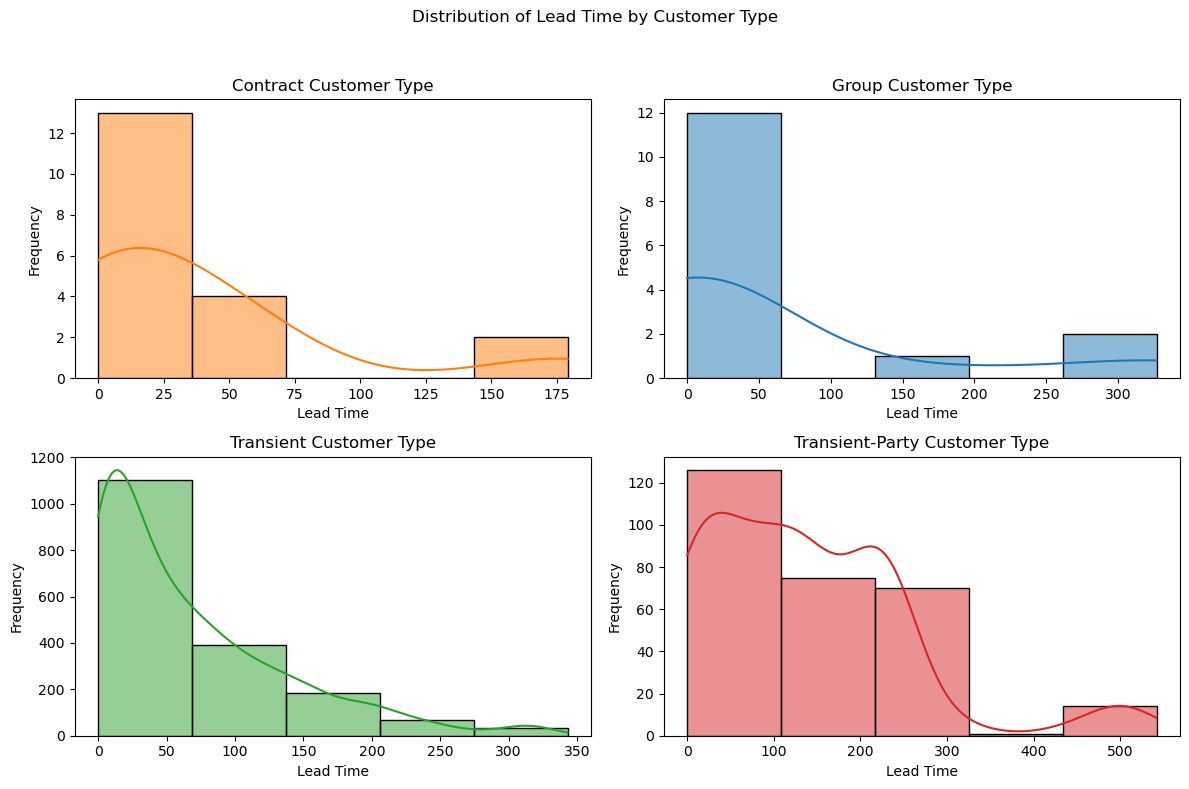

In [40]:
# Define the conditions for different customer types -- will create boolean mask for plotting 
conditions = {
    'Contract': df['customer_type'] == 'Contract',
    'Group': df['customer_type'] == 'Group',
    'Transient': df['customer_type'] == 'Transient',
    'Transient-Party': df['customer_type'] == 'Transient-Party'
}
from scipy.stats import kurtosis
# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax = ax.flatten()  # Flatten the 2D array of axes to make iteration easier

# Plot each distribution
colors = ['tab:orange', 'tab:blue', 'tab:green', 'tab:red']
for i, (key, condition) in enumerate(conditions.items()):
    x = df.loc[condition, 'lead_time']
    sns.histplot(x, ax=ax[i], color=colors[i], kde = True, bins = 5)  # Using histplot with KDE for smoothness #, kde = True
    ax[i].set_title(f'{key} Customer Type')
    ax[i].set_xlabel('Lead Time')
    ax[i].set_ylabel('Frequency')

plt.suptitle('Distribution of Lead Time by Customer Type')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout to make room for the suptitle
plt.show()



### T4_2. II. Which marketing channels are the most effective for reaching specific customer segments?

In [42]:
customerType_dist_chan_analy = pd.crosstab(index = df['customer_type'], columns = df['distribution_channel'])
customerType_dist_chan_analy

distribution_channel,Corporate,Direct,GDS,TA/TO
customer_type,,,,
Contract,0,1,0,18
Group,0,6,0,9
Transient,16,333,22,1406
Transient-Party,19,11,0,256


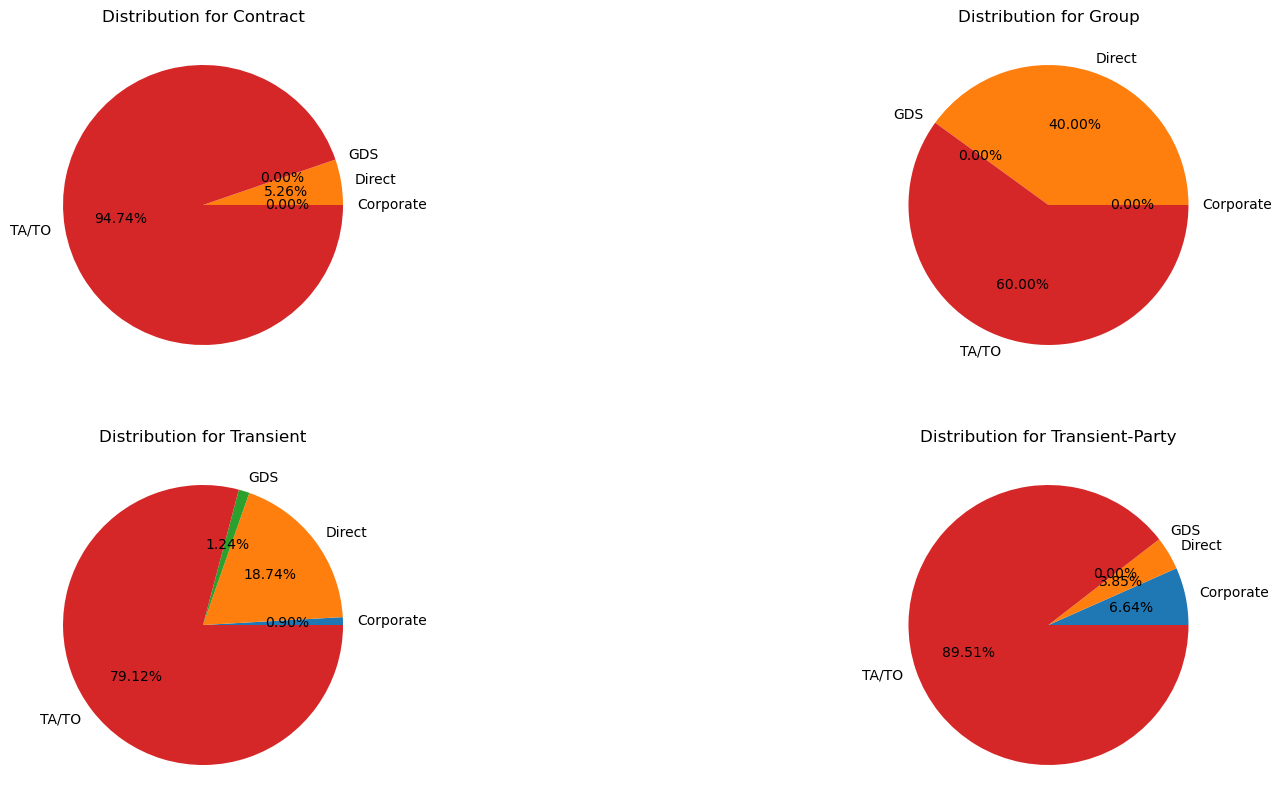

In [43]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
axes = ax.flatten()
for i, customer_type in enumerate(customerType_dist_chan_analy.index):
    
    distribution_data = customerType_dist_chan_analy.loc[customer_type]
    
    
    axes[i].pie(distribution_data, labels=distribution_data.index, autopct='%.2f%%')
    axes[i].set_title(f'Distribution for {customer_type}')
    
plt.show()


In [44]:
customerType_dist_chan_analy

distribution_channel,Corporate,Direct,GDS,TA/TO
customer_type,,,,
Contract,0,1,0,18
Group,0,6,0,9
Transient,16,333,22,1406
Transient-Party,19,11,0,256


Text(0, 0.5, 'FREQUENCY')

<Figure size 2000x1000 with 0 Axes>

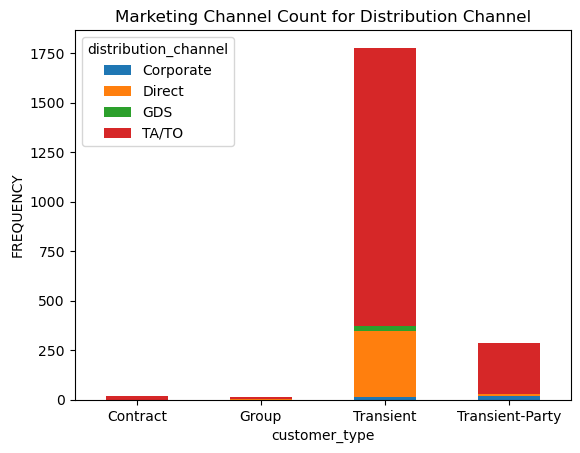

In [45]:
plt.figure(figsize = (20, 10))
ax = customerType_dist_chan_analy.plot(kind = 'bar', stacked = True)


# for container in ax.containers:
#     ax.bar_label(container, label_type='center', fmt = '{:.2f}')

plt.xticks(rotation=0)
plt.title('Marketing Channel Count for Distribution Channel')
plt.ylabel('FREQUENCY')

In [46]:
df['customer_type'].value_counts()

customer_type
Transient          1777
Transient-Party     286
Contract             19
Group                15
Name: count, dtype: int64

Text(0, 0.5, 'Number of Guests')

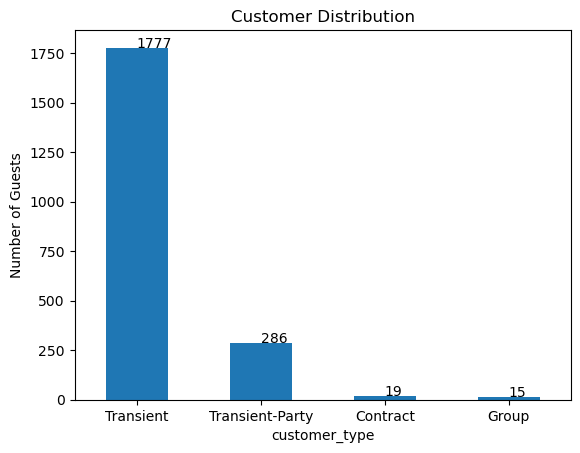

In [47]:
# customer_segment_bar
customer_segment = df.groupby('customer_type').size().sort_values(ascending = False)
customer_segment.plot(kind = 'bar', rot = 0)

for i , value in enumerate(customer_segment):
    plt.text(i, value, str(value))
plt.title('Customer Distribution')
plt.ylabel('Number of Guests')
    #plt.text(value, index, str(value), va='center')

### T4_3. III. How can marketing strategies be customized to resonate with specific customer segments, considering factors such as previous cancellations, booking lead time, and special requests? 

In [49]:
# High Cancellation Risk: Identify customers who have frequently canceled bookings.
# Low Cancellation Risk: Customers with a history of following through with bookings
high_cancel = df[(df['is_canceled'] == 1) & (df['is_repeated_guest'] == 1)]
low_cancel = df[(df['is_canceled'] == 0) & (df['is_repeated_guest'] == 1)]

In [50]:
print(f'Number of Customers having High Cancellation Risk -------> {high_cancel.shape[0]}')

Number of Customers having High Cancellation Risk -------> 1


In [51]:
print(f'Number of Customers having Low Cancellation Risk -------> {low_cancel.shape[0]}')

Number of Customers having Low Cancellation Risk -------> 18


In [52]:
# Early Bookers: Customers who book well in advance 
# Last-Minute Bookers: Customers who book close to the stay date 
early_bookers = df[(df['lead_time'] < 7 ) & (df['is_repeated_guest'] == 1)]
late_bookers = df[(df['lead_time'] >= 7) & (df['is_repeated_guest'] == 1)]
#early_bookers

In [53]:
print(f'Number of Customers WHO BOOK IN ADVANCE -------> {early_bookers.shape[0]}')

Number of Customers WHO BOOK IN ADVANCE -------> 15


In [54]:
print(f'Number of Customers WHO BOOK LAST MINUTE -------> {late_bookers.shape[0]}')

Number of Customers WHO BOOK LAST MINUTE -------> 4


In [55]:
# High-Value Customers: Guests who make frequent special requests, indicating personalized preferences.
# Standard Customers: Guests with few or no special requests.
high_special_requests = df[df['total_of_special_requests'] > 1]
low_special_requests = df[df['total_of_special_requests'] <= 1]
#high_special_requests

In [56]:
print(f'Number of Customers WHO HAVE FREQUENT SPECIAL REQUESTS -------> {high_special_requests.shape[0]}')

Number of Customers WHO HAVE FREQUENT SPECIAL REQUESTS -------> 350


In [57]:
print(f'Number of Customers WHO HAVE VERY FEW SPECIAL REQUESTS -------> {low_special_requests.shape[0]}')

Number of Customers WHO HAVE VERY FEW SPECIAL REQUESTS -------> 1747


# Task 5: Revenue Management

I. How does the Average Daily Rate (ADR) vary over time?

II. Can we identify pricing strategies that maximize revenue?

Ill. Are there specific room types associated with higherADR?

### T5_1.I. How does the Average Daily Rate (ADR) vary over time?

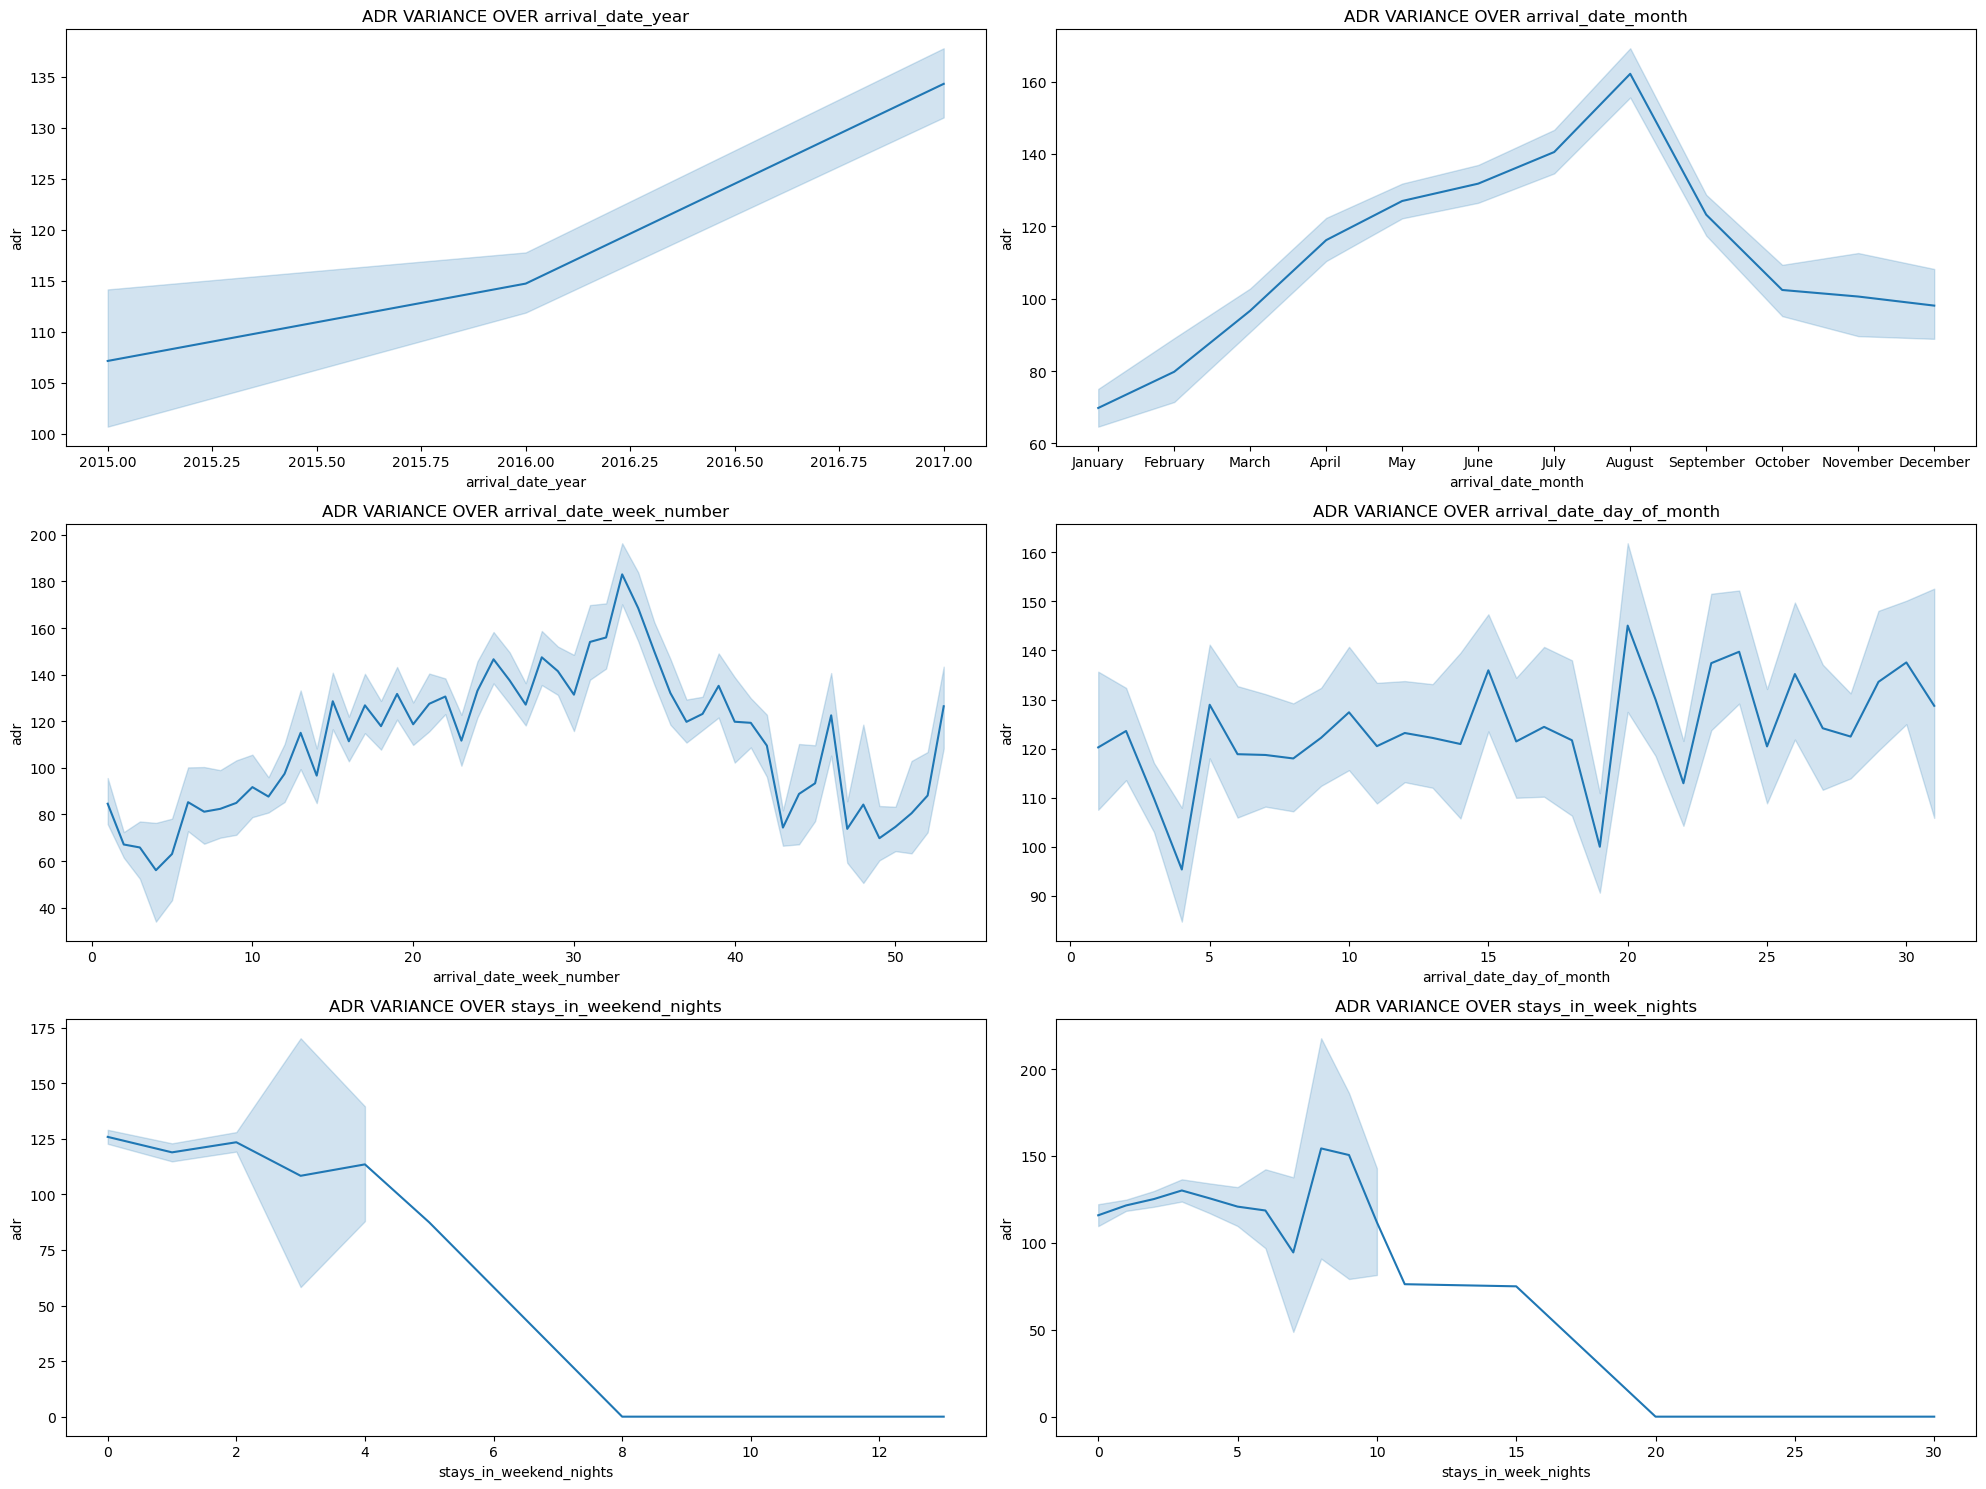

In [60]:
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

time_col = ['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 
            'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights'] 


fig, ax = plt.subplots(3, 2, figsize = (20, 15))
axes = ax.flatten()
for i, col in enumerate(time_col):
    sns.lineplot(x = df[col], y = df['adr'], ax = axes[i])
    axes[i].set_title('ADR VARIANCE OVER ' + col)

plt.tight_layout()
plt.show()

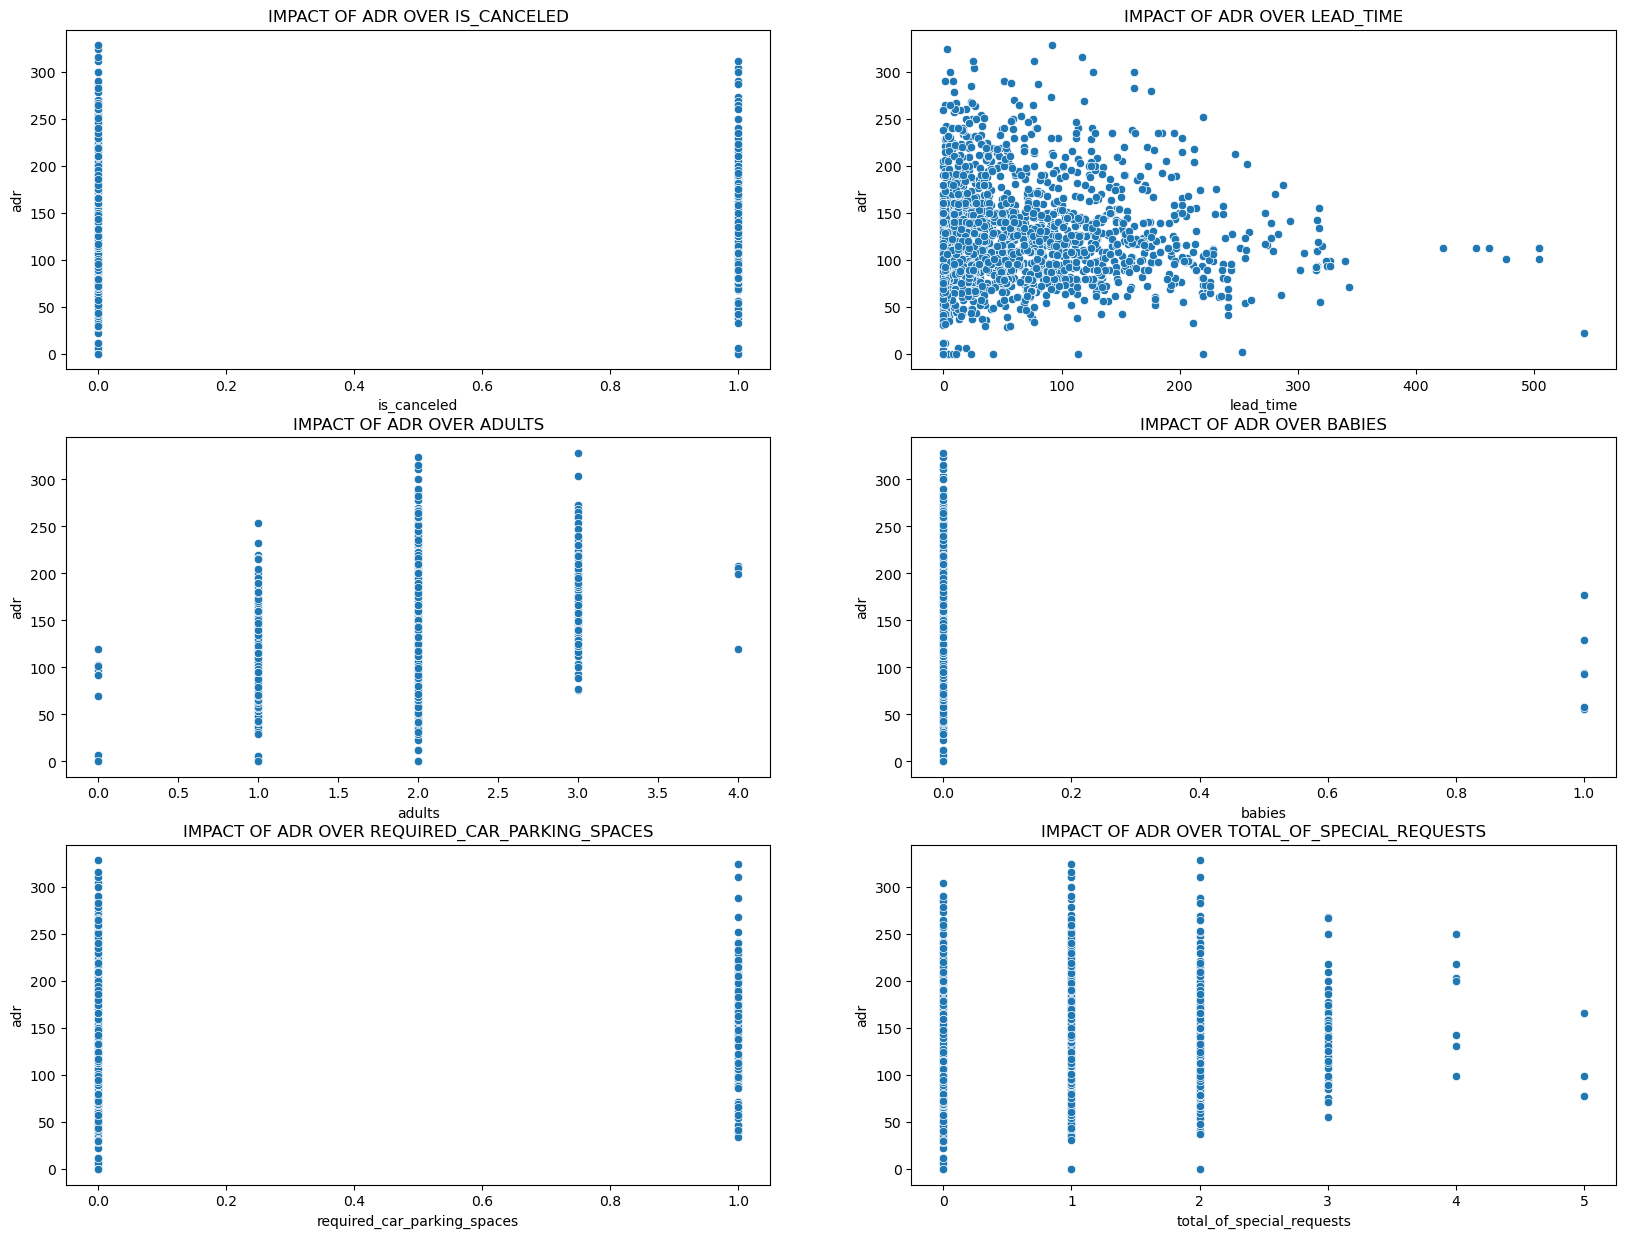

In [61]:
fig, ax = plt.subplots(3, 2, figsize = (20, 15))
axes = ax.flatten()
num_cols = ['is_canceled', 'lead_time', 'adults', 'babies', 'required_car_parking_spaces', 'total_of_special_requests']
for i, col in enumerate(num_cols):
    sns.scatterplot(x=df[col], y=df['adr'], ax = axes[i])
    # sns.lineplot(x = df['adr'], y = df[col], ax = axes[i])
    axes[i].set_title('IMPACT OF ADR OVER ' + col.upper())

plt.show()

### T5_2.II. Can we identify pricing strategies that maximize revenue?

##### redundant

##### interpretation

### T5_3.III. Are there specific room types associated with higherADR?

In [66]:
MEAN = df['adr'].mean()
MEAN

122.9922508345255

In [67]:
high_adr = df.loc[:,['reserved_room_type', 'assigned_room_type', 'adr']][df['adr'] > MEAN]

In [68]:
high_adr_room = high_adr.groupby('assigned_room_type')['adr'].mean().sort_values(ascending = False)
high_adr_room

assigned_room_type
H    223.538667
G    213.893258
I    209.466000
F    193.838447
E    188.556792
C    186.010909
B    168.986000
D    157.951124
A    147.562169
K    138.000000
Name: adr, dtype: float64

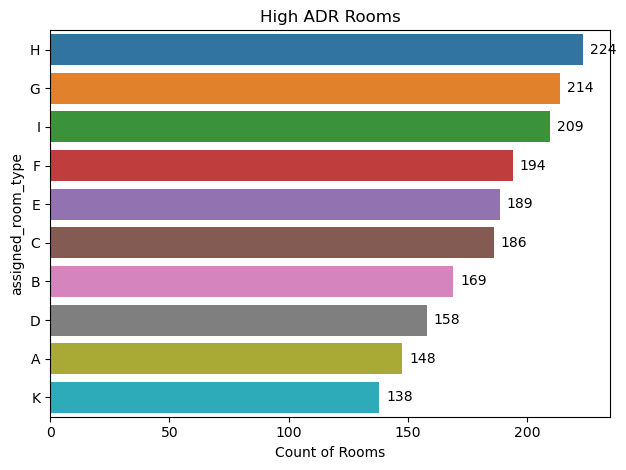

In [69]:
ax = sns.barplot(x = high_adr_room, y = high_adr_room.index)

for p in ax.patches:
    value = round(p.get_width())
    ax.annotate(text=f'{value}', 
                xy=(p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', 
                xytext=(5, 0), 
                textcoords='offset points')

plt.xlabel('Count of Rooms')
plt.title('High ADR Rooms')
plt.tight_layout() 
plt.show()

In [70]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'lead_time_group'],
      dtype='object')

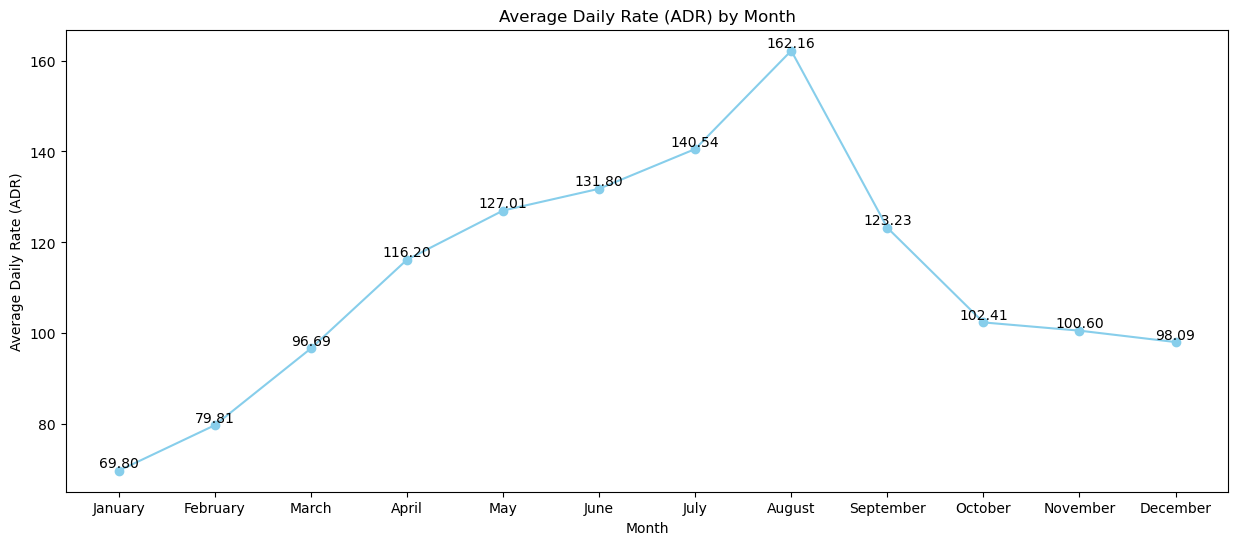

In [71]:
# peak_earning_month
adr_month_wise = df.groupby('arrival_date_month')['adr'].mean()
plt.figure(figsize=(15, 6))  # Adjust the width and height as needed
line = plt.plot(adr_month_wise.index, adr_month_wise, marker='o', linestyle='-', color='skyblue', label='ADR')

plt.title('Average Daily Rate (ADR) by Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(range(len(adr_month_wise)), adr_month_wise.index, rotation=0)  # Ensure all months are shown

# Annotate each point on the line with the exact value
for i, value in enumerate(adr_month_wise):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()

# Task 6: Operational Efficiency

I. What is the effectiveness of different booking distribution channels?

II. How do booking changes impact hotel operations?

III. Is there a correlation between the duration a booking remains on the waiting list and the likelihood of cancellation?

### T6_1. I. What is the effectiveness of different booking distribution channels?

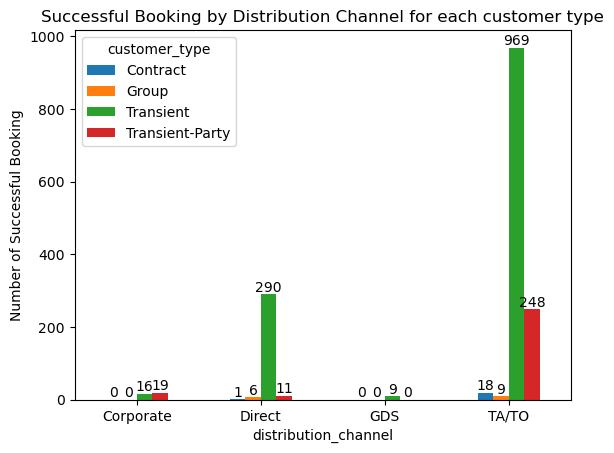

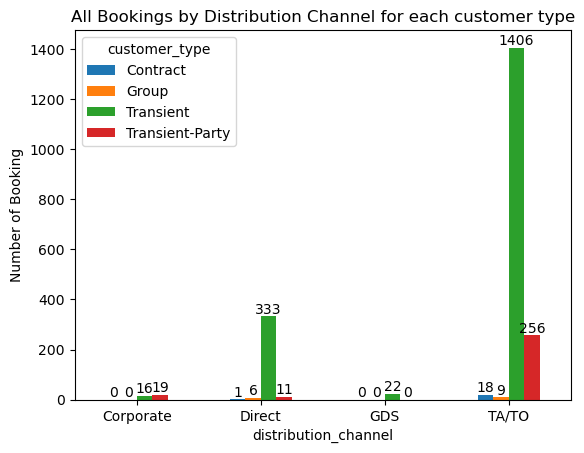

In [74]:
# for all sucessful booking
con = df['is_canceled'] == 0 
customerType_dist_chan_analy2 = pd.crosstab(index = df['distribution_channel'][con], columns = df['customer_type'][con])
# display(customerType_dist_chan_analy2)

ax = customerType_dist_chan_analy2.plot(kind = 'bar', stacked = False)
plt.xticks(rotation=0)
plt.title('Successful Booking by Distribution Channel for each customer type')
plt.ylabel('Number of Successful Booking')

for p in ax.patches:  # Iterate over each bar
    height = p.get_height()  # Get the height of the bar
    ax.annotate(
        f'{height}',  # Text to display
        (p.get_x() + p.get_width() / 2, height),  # Positioning of the text
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=10,  # Font size
        color='black'  # Font color
    )

# for all bookings
customerType_dist_chan_analy2 = pd.crosstab(index = df['distribution_channel'], columns = df['customer_type'])
ax = customerType_dist_chan_analy2.plot(kind = 'bar', stacked = False)
plt.xticks(rotation=0)
plt.title('All Bookings by Distribution Channel for each customer type')
plt.ylabel('Number of Booking')

for p in ax.patches:  # Iterate over each bar
    height = p.get_height()  # Get the height of the bar
    ax.annotate(
        f'{height}',  # Text to display
        (p.get_x() + p.get_width() / 2, height),  # Positioning of the text
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=10,  # Font size
        color='black'  # Font color
    )

plt.show()

### T6_2. II. How do booking changes impact hotel operations?

In [76]:
df.booking_changes.unique()

array([ 0,  1,  2,  3,  5,  4,  6, 14,  8, 11], dtype=int64)

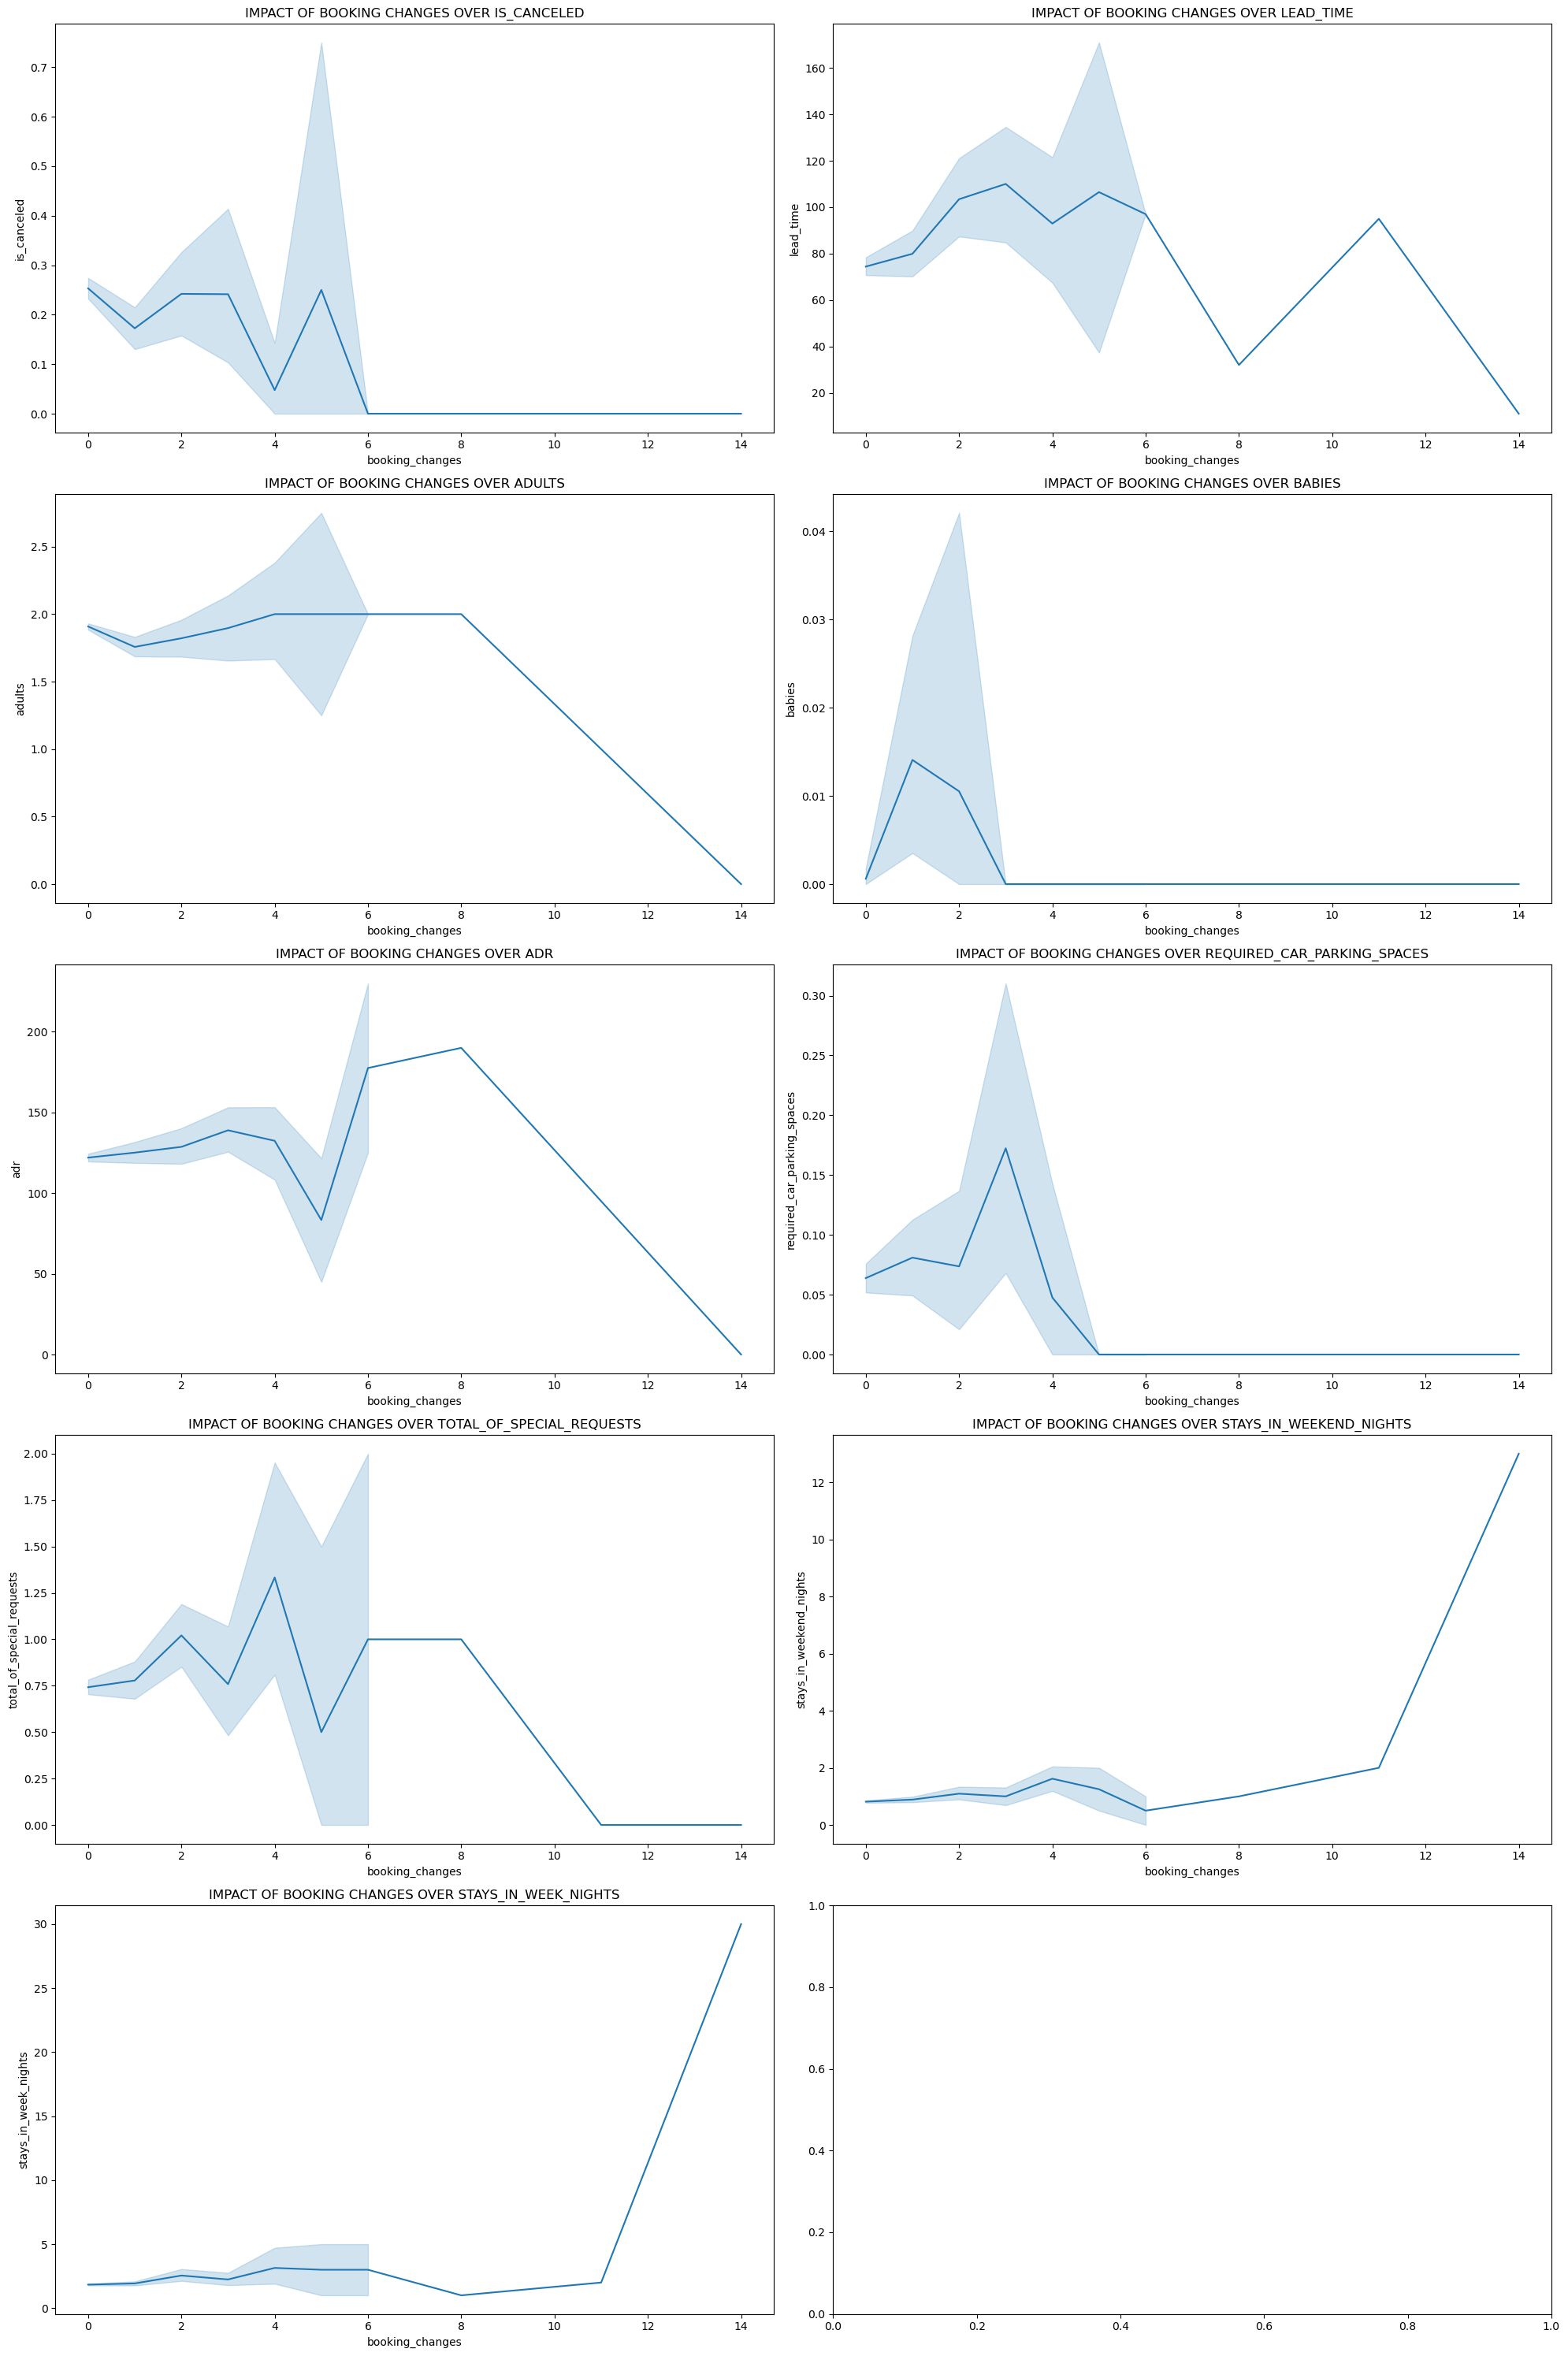

In [77]:
fig, ax = plt.subplots(5, 2, figsize = (20, 30))
axes = ax.flatten()
num_cols = ['is_canceled', 'lead_time', 'adults', 'babies', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'stays_in_weekend_nights', 'stays_in_week_nights']
for i, col in enumerate(num_cols):
    sns.lineplot(x = df['booking_changes'], y = df[col], ax = axes[i])
    axes[i].set_title('IMPACT OF BOOKING CHANGES OVER ' + col.upper())

plt.tight_layout()
plt.show()

### T6_3. III. Is there a correlation between the duration a booking remains on the waiting list and the likelihood of cancellation?

In [79]:
correlation = df['days_in_waiting_list'].corr(df['is_canceled'])
print(correlation)

-0.06089201752421655


<Axes: xlabel='is_canceled', ylabel='days_in_waiting_list'>

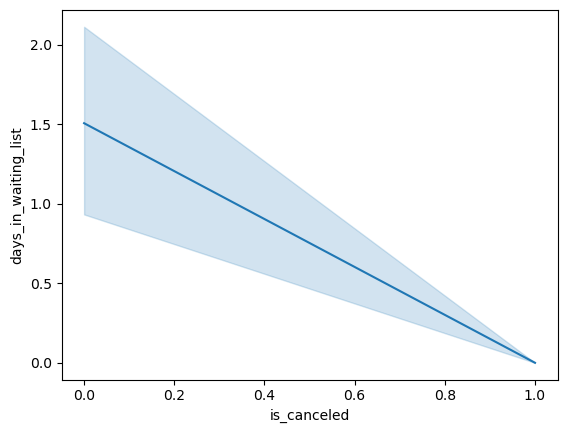

In [80]:
sns.lineplot(x = df['is_canceled'], y = df['days_in_waiting_list'])

## Task 7: Loyalty Programs and Repeat Business

I. What is the behavior of repeated guests with respect to their nature of stay?

II. How does the success of loyalty programs relate to the accommodation of special requests from customers?

III. What factors contribute to repeat business? What is the distribution of lead time for repeated and non-repeated guests?

### T7_1. I. What is the behavior of repeated guests with respect to their nature of stay?

In [83]:
repeated_guests = df[df['is_repeated_guest'] ==1] 

In [84]:
for i in repeated_guests:
    print(f'unique values----{i}----->{repeated_guests[i].unique()}')
    print(f'mode------{i}------>{repeated_guests[i].mode()[0]}\n')

unique values----hotel----->['Resort Hotel' 'City Hotel']
mode------hotel------>City Hotel

unique values----is_canceled----->[0 1]
mode------is_canceled------>0

unique values----lead_time----->[ 49   0   1  23 116  31]
mode------lead_time------>0

unique values----arrival_date_year----->[2016 2017 2015]
mode------arrival_date_year------>2017

unique values----arrival_date_month----->['August', 'July', 'October', 'January', 'June', 'November', 'March', 'May']
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']
mode------arrival_date_month------>January

unique values----arrival_date_week_number----->[36 32 42  2  4 22 31 45 13 11 21  1 24 29 25 27]
mode------arrival_date_week_number------>13

unique values----arrival_date_day_of_month----->[29 31 15  9 25  2  4  5 26 12 20 22  3 28 13 16 21]
mode------arrival_date_day_of_month------>3

unique values----stays_in_weekend_nights----->[2 0 1]
mode------stays_in_weeken

### T7_2. II. How does the success of loyalty programs relate to the accommodation of special requests from customers?

### T7_3. III. What factors contribute to repeat business? What is the distribution of lead time for repeated and non-repeated guests?

In [87]:
non_repeated_guests = df[df['is_repeated_guest'] ==0] 

In [88]:
for i in non_repeated_guests:
    print(f'unique values----{i}----->{non_repeated_guests[i].unique()}')
    print(f'mode------{i}------>{non_repeated_guests[i].mode()[0]}\n')

unique values----hotel----->['Resort Hotel' 'City Hotel']
mode------hotel------>City Hotel

unique values----is_canceled----->[0 1]
mode------is_canceled------>0

unique values----lead_time----->[ 68  14  10   9  51  98  88  42   7  70 110   5  34  30   2   0   4  25
 119  69 130  54  11  23  44  46  18   3  24  22 114  91  77  26 123 124
 542  36 139 135  75  76  40  73 211 133 255 192  55  28  16  94 201 259
  12 175  57 244 103 116  59 171 153 161 188 160  17  74  41  39  13  71
  37  49 193  32  89 172 179  81  38   1 109  58  29   6  19  27   8  79
 113  33  67 129 136  65  56  48 170  61  97  92 151 217  15  95 219  50
 237 228 205 145  35 146 100 108 155  80  21  53 241  63  84  85  96 319
 106 120  93 203 112  83 247 104  64  45 159  72 164 199 281  60 117 220
 212 173 176 194 125 126  82  52  62 233  31  87  78  86 102 107 169 144
 154  90 206 101 128  99 134 131 143 127 105 243 198 253 274  47 122 196
  20 223 195  43 208 111 202 316 148 327 324 156 224 283 272 185 225 315
 1

Total Non-Repeated Guests -----2078
Total Repeated Guests -----19


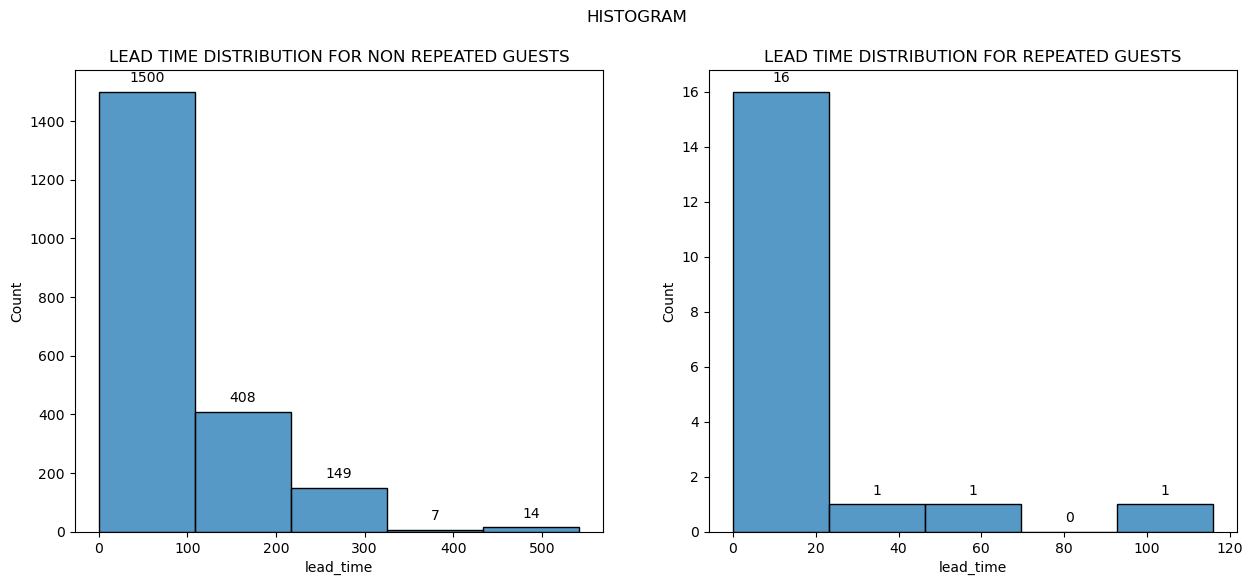

In [167]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
sns.histplot(data = non_repeated_guests, x = 'lead_time', ax = ax[0], bins = 5)
ax[0].set_title('LEAD TIME DISTRIBUTION FOR NON REPEATED GUESTS')

for p in ax[0].patches:
    ax[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

sns.histplot(data = repeated_guests, x = 'lead_time', ax = ax[1], bins = 5)
ax[1].set_title('LEAD TIME DISTRIBUTION FOR REPEATED GUESTS')

for p in ax[1].patches:
    ax[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.suptitle('HISTOGRAM')
print(f'Total Non-Repeated Guests -----{len(non_repeated_guests)}')
print(f'Total Repeated Guests -----{len(repeated_guests)}')

Text(0.5, 0.98, 'BOXPLOT')

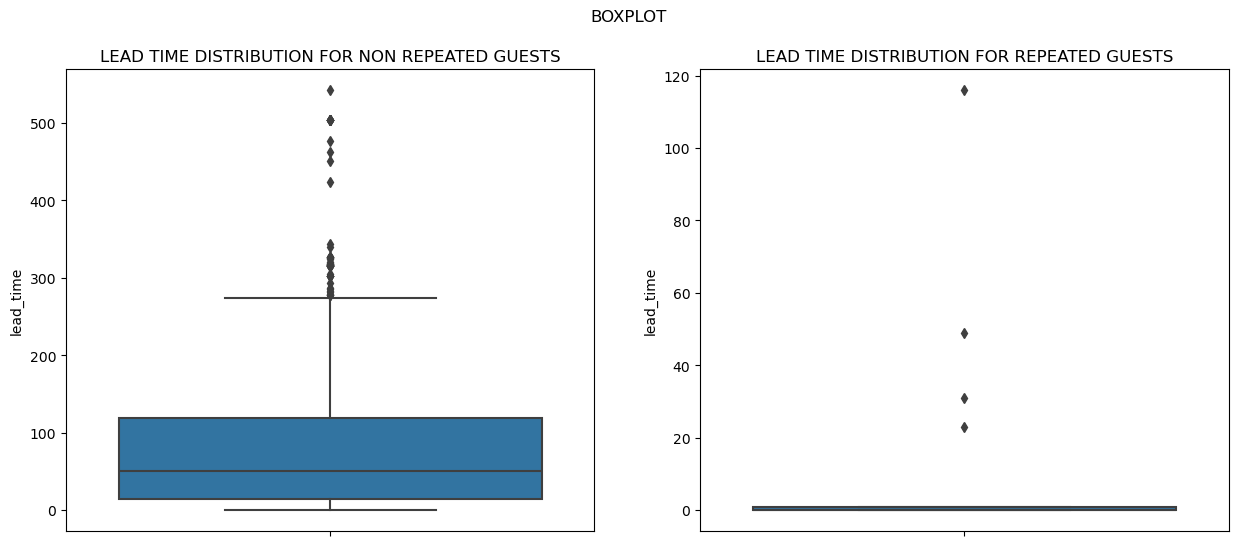

In [158]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
sns.boxplot(data = non_repeated_guests, y = 'lead_time', ax = ax[0])
ax[0].set_title('LEAD TIME DISTRIBUTION FOR NON REPEATED GUESTS')

sns.boxplot(data = repeated_guests, y = 'lead_time', ax = ax[1])
ax[1].set_title('LEAD TIME DISTRIBUTION FOR REPEATED GUESTS')

plt.suptitle('BOXPLOT')

# ALL INTERPRETATIONS 

# SUMMARY